**ASSIGNMENT 4**

1. Group Name: \\THE 29TH group
   Member Names: \\ANDREW HENDERSON Syed Zohaib Ahmed
   Member Student Numbers: \\300190291, 300136941
   Report Title: \\ASSIGNMENT 4 

**Derived Datasets**

These are the imports used for this assignment.

In [118]:
import spacy
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import matplotlib.pylab as plt
import matplotlib.pyplot as plt

This is the URL for the dataset chosen. 

In [78]:
url = 'https://raw.githubusercontent.com/syedahmed1674/A4Csi4106/main/reduced_file_cnnnews.csv'

In [79]:
print(url)
data = pd.read_csv(url)

https://raw.githubusercontent.com/syedahmed1674/A4Csi4106/main/reduced_file_cnnnews.csv


To test to see if we retrieved the data we can print the first few elements with .head()

In [80]:
data.head()

,ID,Title,Description,Body,Keywords,Theme,Link
0,1,Candy factory didn't evacuate concerned worker...,An eastern Pennsylvania candy factory didn’t e...,An eastern Pennsylvania candy factory didn’t e...,"accident investigations, accidents, accidents,...",us,https://edition.cnn.com/2023/10/06/us/pennsylv...
1,2,Baltimore police ask for public's help identif...,Two shooters were involved in an attack at Mor...,Two shooters were involved in an attack at Mor...,"baltimore, brand safety-nsf crime, brand safet...",us,https://edition.cnn.com/2023/10/06/us/morgan-s...
2,3,An arrest warrant has been issued for a suspec...,Authorities in Pennsylvania say they have issu...,Authorities in Pennsylvania say they have issu...,"arrest warrants, arrests, brand safety-nsf cri...",us,https://edition.cnn.com/2023/10/06/us/josh-kru...
3,4,115 improperly stored human remains found in C...,An investigation into more than 115 bodies fou...,An investigation into more than 115 bodies fou...,"brand safety-nsf death, brand safety-nsf sensi...",us,https://edition.cnn.com/2023/10/06/us/colorado...
4,5,Bronx day care provider and 2 others indicted ...,"A Bronx day care provider, her husband and his...","A Bronx day care provider, her husband and his...","brand safety-nsf crime, brand safety-nsf death...",us,https://edition.cnn.com/2023/10/05/us/bronx-da...


This is where we create the NLP pipeline. load() will download the correct model (English).

In [81]:
nlp = spacy.load("en_core_web_sm")

Applying the pipeline to every sentences creates a Document where every word is a Token object.

Doc: https://spacy.io/api/doc

Token: https://spacy.io/api/token

In [82]:
#Apply nlp pipeline to the column that has your sentences.
data['tokenized'] = data['Body'].apply(nlp)

A Token object has many attributes such as part-of-speech (pos_), lemma (lemma_), etc. 

In [84]:
#create empty dataframes that will store the derived datasets

derived_dataset1 = pd.DataFrame(columns = ['Class', 'pos'])
derived_dataset2 = pd.DataFrame(columns = ['Class', 'pos-np'])

The function 'get_pos' is designed to extract specific parts of speech (POS) from a given sentence, focusing on the desired POS tags specified by 'wanted_pos.' This is done to isolate and collect words that fall under the chosen POS categories, which can be valuable for various natural language processing (NLP) tasks. By extracting and joining these words as a string, the function prepares the text data for further analysis using techniques like CountVectorizer. For example, when conducting sentiment analysis or text classification, selecting and grouping specific POS tags like verbs can help in capturing the essential semantic information within the text, which is crucial for accurate and effective NLP modeling.

In [85]:
def get_pos(sentence, wanted_pos): #wanted_pos refers to the desired pos tagging
    verbs = []
    for token in sentence:
        if token.pos_ in wanted_pos:
            verbs.append(token.lemma_) # lemma returns a number. lemma_ return a string
    return ' '.join(verbs) # return value is as a string and not a list for countVectorizer

In [86]:
#We use the above function to fetch all the verbs. We store this information in our first derived dataset
derived_dataset1['pos'] = data['tokenized'].apply(lambda sent : get_pos(sent, ['VERB']))

We can verify the first few contents of derived_dataset1 by using .head() 

In [87]:
derived_dataset1.head()

,Class,pos
0,NaN,evacuate say smell leave injure announce base ...
1,NaN,involve injure confirm ask identify see walk c...
2,NaN,say issue suspect kill advocate identify consi...
3,NaN,find store offer take say find go say have nee...
4,NaN,indict expose include die say indict accord sa...


The code is performing named entity extraction and selected parts-of-speech tagging to preprocess and structure textual data. This preprocessing is essential in natural language processing (NLP) tasks, where understanding the context and content of text is critical. Extracting named entities helps identify and categorize specific entities within the text, providing valuable information for tasks like information retrieval and entity recognition. Similarly, isolating certain parts of speech like nouns, verbs, and adjectives allows for a more focused analysis, aiding in sentiment analysis, summarization, and other NLP applications that rely on the semantic and syntactic characteristics of the text.

In [89]:
def extract_entities_and_pos(text):

    doc = nlp(text)


    named_entities = []
    selected_pos_tags = []


    for token in doc:
        # Check if the token is a named entity
        if token.ent_type:
            named_entities.append((token.text, token.ent_type))


        if token.pos_ in ['NOUN', 'VERB', 'ADJ']:
            selected_pos_tags.append((token.text, token.pos))

    return named_entities, selected_pos_tags

We can verify the elements of derived_dataset2 through .head()

In [90]:
derived_dataset2['named_entities'], derived_dataset2['selected_pos_tags'] = zip(*data['tokenized'].apply(extract_entities_and_pos))
derived_dataset2.head()

,Class,pos-np,named_entities,selected_pos_tags
0,NaN,NaN,"[(Pennsylvania, 384), (March, 391), (seven, 39...","[(eastern, 84), (candy, 92), (factory, 92), (e..."
1,NaN,NaN,"[(Two, 397), (Morgan, 383), (State, 383), (Uni...","[(shooters, 92), (involved, 100), (attack, 92)..."
2,NaN,NaN,"[(Pennsylvania, 384), (Josh, 380), (Kruger, 38...","[(Authorities, 92), (say, 100), (issued, 100),..."
3,NaN,NaN,"[(more, 397), (than, 397), (115, 397), (Colora...","[(investigation, 92), (more, 84), (bodies, 92)..."
4,NaN,NaN,"[(Bronx, 384), (four, 397), (1, 391), (-, 391)...","[(day, 92), (care, 92), (provider, 92), (husba..."


**Perform Classification Task**

This function, 'runtest,' assesses a machine learning model's performance. It fits the 'model' to the training data, uses it to predict labels for the test data, calculates accuracy, generates a comprehensive classification report with precision, recall, and F1-score metrics for each class, and ultimately returns the accuracy and classification report as evaluation results.

In [91]:
def runtest(model, X_train, X_test, y_train, y_test):
    # Fit the 'model' to the training data.
    model.fit(X_train, y_train)
    
    # Use the trained model to make predictions on the test data.
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy of the model by comparing predicted labels ('y_pred') to true labels ('y_test').
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate a classification report that includes metrics such as precision, recall, and F1-score for each class.
    report = classification_report(y_test, y_pred)
    
    # Return the accuracy and classification report as results of the model evaluation.
    return accuracy, report

**MODEL 1: MLP Model on DATASET 1 with no parameters**


In [131]:
# Assigning the 'data' dataset to the variable 'dataset' for convenience.
dataset = data

# Splitting the dataset into training and testing sets, with 80% for training and 20% for testing.
# We're using the columns 'Title', 'Description', 'Body', 'Keywords', and 'Link' as features ('X') 
# and the 'Theme' column as the target ('y').
X_train, X_test, y_train, y_test = train_test_split(dataset[['Title', 'Description', 'Body', 'Keywords', 'Link']], dataset['Theme'], test_size=0.2, random_state=42)

# Creating a TF-IDF vectorizer with a maximum of 1000 features.
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Transforming the 'Body' text data in the training set into TF-IDF vectors.
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['Body'])

# Transforming the 'Body' text data in the testing set into TF-IDF vectors using the same vectorizer.
X_test_tfidf = tfidf_vectorizer.transform(X_test['Body'])


The provided code is performing a machine learning experiment to assess the performance of a Multi-Layer Perceptron (MLP) classifier on a text classification task. It uses the 'runtest' function to train the MLP model on the TF-IDF transformed training data ('X_train_tfidf') and evaluates its performance on the TF-IDF transformed testing data ('X_test_tfidf') using the ground truth labels 'y_train' and 'y_test.' The accuracy score of 0.79 is a measure of how accurately the model predicted the class labels of the test data. An accuracy of 0.79 indicates that the model correctly predicted approximately 79% of the test data's labels. This accuracy is a significant metric as it quantifies the model's overall performance; higher accuracy values indicate better classification results, while lower values suggest room for improvement. Therefore, an accuracy of 0.79 suggests that the MLP classifier performed reasonably well on the given text classification task.

In [93]:
mlp_model = MLPClassifier()
a,z = runtest(mlp_model,X_train_tfidf, X_test_tfidf, y_train, y_test)
print(z)

               precision    recall  f1-score   support

     business       0.88      0.86      0.87        43
entertainment       0.62      0.62      0.62        21
       health       0.86      0.94      0.90        33
     opinions       0.78      0.64      0.71        28
     politics       0.85      0.81      0.83        27
        sport       0.79      0.92      0.85        25
        style       0.00      0.00      0.00         6
       travel       0.00      0.00      0.00         1
           us       0.67      0.53      0.59        19
      weather       0.95      1.00      0.98        20
        world       0.71      0.83      0.77        60

     accuracy                           0.79       283
    macro avg       0.65      0.65      0.65       283
 weighted avg       0.77      0.79      0.78       283



C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-

The code  serves the purpose of assessing the performance of a machine learning model, specifically an MLP classifier, using K-Fold cross-validation. K-Fold cross-validation is beneficial because it divides the dataset into 'n' subsets (in this case, 10 subsets due to 'n_splits=10') and iteratively uses one of these subsets as the test set while training the model on the remaining data. This process is repeated 10 times (controlled by 'n_splits=10') so that each subset serves as the test set once. The results, in the form of accuracy scores for each fold, are averaged and provide a more robust estimate of the model's performance, reducing the risk of overfitting to a specific train-test split. The 'shuffle=True' parameter adds randomness by shuffling the data before splitting, further ensuring a more representative evaluation. The printed accuracy score, along with its standard deviation, summarizes how well the MLP classifier generalizes to unseen data, offering a more reliable assessment of its effectiveness in the real-world scenario.

In [94]:
cv = KFold(n_splits=10, random_state=5, shuffle=True)
scores = cross_val_score(mlp_model, X_test_tfidf, y_pred_mlp, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.784 (0.071)


**MODEL 2: MLP Model 2 on DATASET 1, with parameters (hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)**


In [95]:
# Assigning the 'data' dataset to the variable 'dataset' for convenience.
dataset = data

# Splitting the dataset into training and testing sets:
# - Features ('X_train' and 'X_test') consist of columns 'Title', 'Description', 'Body', 'Keywords', and 'Link'.
# - The target ('y_train' and 'y_test') is represented by the 'Theme' column.
# - We allocate 20% of the data for testing, with a fixed random seed (random_state=42) for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(dataset[['Title', 'Description', 'Body', 'Keywords', 'Link']], dataset['Theme'], test_size=0.2, random_state=42)

# Creating a TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer with a maximum of 1000 features.
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Transforming the 'Body' text data in the training set into TF-IDF vectors using the vectorizer.
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['Body'])

# Transforming the 'Body' text data in the testing set into TF-IDF vectors using the same vectorizer.
X_test_tfidf = tfidf_vectorizer.transform(X_test['Body'])


This code initializes an MLP (Multi-Layer Perceptron) classifier named 'mod2' with specific parameters. The choice of these parameters is motivated by a desire to optimize model performance while considering computational efficiency. 'hidden_layer_sizes=(64, 32)' defines a two-layer architecture that balances model complexity and computational resources. 'max_iter=1000' sets the maximum number of training iterations to ensure effective learning, while 'random_state=42' ensures result reproducibility. The code then uses the 'runtest' function to train 'mod2' on TF-IDF transformed training data and evaluate its performance on the testing data. This parameter selection strategy aims to strike a balance between model capacity, training effectiveness, and consistent results, providing a robust assessment of 'mod2's suitability for text classification.

In [96]:
mod2 = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
b,z = runtest(mod2,X_train_tfidf, X_test_tfidf, y_train, y_test)
print(z)

               precision    recall  f1-score   support

     business       0.86      0.88      0.87        43
entertainment       0.63      0.57      0.60        21
       health       0.89      0.94      0.91        33
     opinions       0.80      0.57      0.67        28
     politics       0.73      0.81      0.77        27
        sport       0.82      0.92      0.87        25
        style       0.00      0.00      0.00         6
       travel       0.00      0.00      0.00         1
           us       0.56      0.53      0.54        19
      weather       0.95      1.00      0.98        20
        world       0.73      0.80      0.76        60

     accuracy                           0.78       283
    macro avg       0.63      0.64      0.63       283
 weighted avg       0.76      0.78      0.77       283



C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This code employs K-Fold cross-validation to assess the performance of the 'mod2' MLP classifier on a text classification task. The choice of using K-Fold cross-validation is crucial because it allows for a more robust evaluation of the model's generalization capabilities by repeatedly splitting the dataset into training and testing subsets, ensuring that every data point serves as both training and testing data at some point. With 'n_splits=10,' it divides the data into 10 subsets, enhancing reliability. The 'shuffle=True' option introduces randomness by shuffling the data before splitting, reducing the risk of any order-related bias. The 'cross_val_score' function computes accuracy scores for each fold, and the final result, along with its standard deviation, is printed. This approach offers a comprehensive and dependable evaluation of 'mod2's performance, providing insights into how well the model is expected to generalize to unseen data.

In [97]:
cv = KFold(n_splits=10, random_state=5, shuffle=True)
scores = cross_val_score(mod2, X_test_tfidf, y_pred_mlp, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.767 (0.069)


**MODEL 3: MLP Model 3 on DATASET 1, with parameters: (hidden_layer_sizes=(128, 64), max_iter=1000, random_state=42)**

In [135]:
# Assigning the 'data' dataset to the variable 'dataset' for convenience.
dataset = data

# Splitting the dataset into training and testing sets:
# - Features ('X_train' and 'X_test') consist of columns 'Title', 'Description', 'Body', 'Keywords', and 'Link'.
# - The target ('y_train' and 'y_test') is represented by the 'Theme' column.
# - We allocate 20% of the data for testing, with a fixed random seed (random_state=42) for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(dataset[['Title', 'Description', 'Body', 'Keywords', 'Link']], dataset['Theme'], test_size=0.2, random_state=42)

# Creating a TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer with a maximum of 1000 features.
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Transforming the 'Body' text data in the training set into TF-IDF vectors using the vectorizer.
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['Body'])

# Transforming the 'Body' text data in the testing set into TF-IDF vectors using the same vectorizer.
X_test_tfidf = tfidf_vectorizer.transform(X_test['Body'])


This code continues the machine learning experiment with an MLP classifier, 'mod3,' for text classification. Initially, the architecture was set to '(64, 32)' to balance model complexity and resource efficiency. However, in this iteration, it has been adjusted to '(128, 64)' to explore a deeper neural network with more neurons, potentially capturing more intricate patterns in the data. The 'max_iter=1000' parameter ensures effective learning, and 'random_state=42' ensures result reproducibility. The code utilizes the 'runtest' function to train 'mod3' on TF-IDF transformed training data and evaluate its performance on the testing data. This parameter adjustment reflects an experimentation-driven decision to explore a more complex model architecture, aiming to further enhance 'mod3's effectiveness in text classification and evaluating its impact on model performance.

In [99]:
mod3 = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=42)
c,z = runtest(mod3,X_train_tfidf, X_test_tfidf, y_train, y_test)
print(z)

               precision    recall  f1-score   support

     business       0.88      0.84      0.86        43
entertainment       0.59      0.62      0.60        21
       health       0.89      0.97      0.93        33
     opinions       0.85      0.61      0.71        28
     politics       0.79      0.85      0.82        27
        sport       0.79      0.88      0.83        25
        style       1.00      0.17      0.29         6
       travel       0.00      0.00      0.00         1
           us       0.53      0.53      0.53        19
      weather       0.95      1.00      0.98        20
        world       0.74      0.82      0.78        60

     accuracy                           0.79       283
    macro avg       0.73      0.66      0.66       283
 weighted avg       0.79      0.79      0.78       283



C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This code employs K-Fold cross-validation to evaluate the performance of the 'mod3' MLP classifier with an architecture of '(128, 64)' on a text classification task. The choice of K-Fold cross-validation with 'n_splits=10' ensures a robust assessment by repeatedly dividing the data into ten subsets for training and testing, reducing the risk of overfitting to a specific split. The 'shuffle=True' option introduces randomness in data splitting for more reliable results. The 'cross_val_score' function calculates accuracy scores for each fold of the cross-validation process, and the final result, with an accuracy of 0.788, is printed. This accuracy score indicates that 'mod3' correctly predicted approximately 78.8% of the test data's labels, offering a quantitative measure of its performance in text classification.

In [100]:
cv = KFold(n_splits=10, random_state=5, shuffle=True)
scores = cross_val_score(mod3, X_test_tfidf, y_pred_mlp, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.788 (0.056)


**MODEL 4: Logistic Regression Model on DATASET 1:**


This code snippet performs text classification using a Logistic Regression model. First, the 'logistic_regression_model' is initialized, then it's trained on the TF-IDF transformed training data 'X_train_tfidf' and corresponding labels 'y_train.' Following training, it predicts labels for the test data using 'X_test_tfidf' and stores the predictions in 'y_pred_logistic.' The code calculates the accuracy score by comparing the true test labels 'y_test' with the predicted labels and stores it in 'd.' Finally, it generates and prints a comprehensive classification report that includes metrics such as precision, recall, and F1-score. This entire process evaluates the Logistic Regression model's performance on text classification tasks, providing insights into its accuracy and predictive capabilities.

In [129]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)
d = accuracy_score(y_test, y_pred_logistic)
y_pred_logistic = logistic_regression_model.predict(X_test_tfidf)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))

Logistic Regression Classification Report:
                precision    recall  f1-score   support

     business       0.88      0.86      0.87        43
entertainment       0.71      0.57      0.63        21
       health       0.76      0.88      0.82        33
     opinions       0.62      0.29      0.39        28
     politics       0.67      0.74      0.70        27
        sport       0.85      0.88      0.86        25
        style       0.00      0.00      0.00         6
       travel       0.00      0.00      0.00         1
           us       1.00      0.11      0.19        19
      weather       0.95      1.00      0.98        20
        world       0.57      0.90      0.70        60

     accuracy                           0.72       283
    macro avg       0.64      0.57      0.56       283
 weighted avg       0.73      0.72      0.69       283



C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



This code snippet employs K-Fold cross-validation to assess the performance of a Logistic Regression model on a text classification task. By setting 'n_splits=4,' it divides the data into four subsets for training and testing, ensuring a robust evaluation of the model's generalization abilities while reducing the risk of overfitting to specific data splits. The 'shuffle=True' parameter introduces randomness in data splitting for more reliable results. The 'cross_val_score' function calculates accuracy scores for each fold of the cross-validation process, and the final printed accuracy score, along with its standard deviation, provides a quantifiable measure of the Logistic Regression model's performance in text classification. This approach ensures a more comprehensive and dependable assessment of the model's effectiveness on unseen data.

In [102]:
cv = KFold(n_splits=4, random_state=5, shuffle=True)
scores = cross_val_score(logistic_regression_model, X_test_tfidf, y_pred_mlp, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.625 (0.037)


**We repeat the experiment from models 5-12 with the MLP Models 1-3 and Logistic Regression Model for derived dataset 1 and derived dataset 2**

**MODEL 5: MLP Model 1 on DERIVED DATASET 1, with no parameters:**

In [133]:
# Splitting the 'derived_dataset1' into training and testing sets:
# - Features ('X_train' and 'X_test') consist of a single column 'pos'.
# - The target ('y_train' and 'y_test') is represented by the 'Theme' column from the original 'dataset'.
# - We allocate 20% of the data for testing, with a fixed random seed (random_state=42) for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(derived_dataset1[['pos']], dataset['Theme'], test_size=0.2, random_state=42)

# Creating a TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer with a maximum of 1000 features.
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Transforming the 'pos' text data in the training set into TF-IDF vectors using the vectorizer.
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['pos'])

# Transforming the 'pos' text data in the testing set into TF-IDF vectors using the same vectorizer.
X_test_tfidf = tfidf_vectorizer.transform(X_test['pos'])


In [104]:
d1mod1 = MLPClassifier()
e,z = runtest(d1mod1,X_train_tfidf, X_test_tfidf, y_train, y_test)
print(z)

               precision    recall  f1-score   support

     business       0.62      0.74      0.67        43
entertainment       0.71      0.57      0.63        21
       health       0.87      0.82      0.84        33
     opinions       0.89      0.61      0.72        28
     politics       0.59      0.70      0.64        27
        sport       0.73      0.76      0.75        25
        style       0.00      0.00      0.00         6
       travel       0.00      0.00      0.00         1
           us       0.69      0.47      0.56        19
      weather       0.91      1.00      0.95        20
        world       0.61      0.72      0.66        60

     accuracy                           0.70       283
    macro avg       0.60      0.58      0.58       283
 weighted avg       0.70      0.70      0.69       283



C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**MODEL 6: MLP Model 2 on DERIVED DATASET 1, with parameters: (hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)**

In [105]:
d1mod2 = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
f,z = runtest(d1mod2,X_train_tfidf, X_test_tfidf, y_train, y_test)
print(z)

               precision    recall  f1-score   support

     business       0.59      0.77      0.67        43
entertainment       0.67      0.48      0.56        21
       health       0.87      0.82      0.84        33
     opinions       0.95      0.68      0.79        28
     politics       0.58      0.70      0.63        27
        sport       0.62      0.72      0.67        25
        style       0.00      0.00      0.00         6
       travel       0.00      0.00      0.00         1
           us       0.67      0.42      0.52        19
      weather       0.91      1.00      0.95        20
        world       0.66      0.70      0.68        60

     accuracy                           0.69       283
    macro avg       0.59      0.57      0.57       283
 weighted avg       0.69      0.69      0.68       283



C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**MODEL 7: MLP Model 3 on DERIVED DATASET 1, with parameters: (hidden_layer_sizes=(128, 64), max_iter=1000, random_state=42)**

In [106]:
d1mod3 = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=42)
g,z = runtest(d1mod3,X_train_tfidf, X_test_tfidf, y_train, y_test)
print(z)

               precision    recall  f1-score   support

     business       0.64      0.74      0.69        43
entertainment       0.69      0.43      0.53        21
       health       0.87      0.82      0.84        33
     opinions       0.86      0.64      0.73        28
     politics       0.55      0.67      0.60        27
        sport       0.65      0.80      0.71        25
        style       0.00      0.00      0.00         6
       travel       0.00      0.00      0.00         1
           us       0.69      0.47      0.56        19
      weather       0.91      1.00      0.95        20
        world       0.59      0.67      0.62        60

     accuracy                           0.68       283
    macro avg       0.59      0.57      0.57       283
 weighted avg       0.68      0.68      0.67       283



C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**MODEL 8: Logistic Regression Model on DERIVED DATASET 1**

In [107]:
logistic_regression_model = LogisticRegression()
h,z = runtest(mod,X_train_tfidf, X_test_tfidf, y_train, y_test)
print(z)

               precision    recall  f1-score   support

     business       0.64      0.74      0.69        43
entertainment       0.69      0.43      0.53        21
       health       0.87      0.82      0.84        33
     opinions       0.86      0.64      0.73        28
     politics       0.55      0.67      0.60        27
        sport       0.65      0.80      0.71        25
        style       0.00      0.00      0.00         6
       travel       0.00      0.00      0.00         1
           us       0.69      0.47      0.56        19
      weather       0.91      1.00      0.95        20
        world       0.59      0.67      0.62        60

     accuracy                           0.68       283
    macro avg       0.59      0.57      0.57       283
 weighted avg       0.68      0.68      0.67       283



C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Analysis**: In the evaluation on derived dataset 1, we observed differing accuracy scores among the models. MLP Model 1, which utilized default parameters, achieved the highest accuracy of 0.7. Hypothetically, this might be because the dataset's characteristics align well with the default settings, and additional complexity introduced by customized parameters could have led to overfitting or underfitting. On the other hand, MLP Model 2, with a simpler architecture of (64, 32), and MLP Model 3, employing a more complex architecture of (128, 64), achieved slightly lower accuracies of 0.69 and 0.68, respectively. The hypothesis here is that Model 2 might be slighly underutilizing its capacity, while Model 3's greater complexity may have caused it to overfit the data. The Logistic Regression model performed similarly to MLP Model 3, suggesting that a simpler linear model was effective for this dataset. Ultimately, this highlights the importance of carefully tailored architecture parameters based on dataset characteristics to optimize model performance.

In [108]:
derived_dataset2.head()

,Class,pos-np,named_entities,selected_pos_tags
0,NaN,NaN,"[(Pennsylvania, 384), (March, 391), (seven, 39...","[(eastern, 84), (candy, 92), (factory, 92), (e..."
1,NaN,NaN,"[(Two, 397), (Morgan, 383), (State, 383), (Uni...","[(shooters, 92), (involved, 100), (attack, 92)..."
2,NaN,NaN,"[(Pennsylvania, 384), (Josh, 380), (Kruger, 38...","[(Authorities, 92), (say, 100), (issued, 100),..."
3,NaN,NaN,"[(more, 397), (than, 397), (115, 397), (Colora...","[(investigation, 92), (more, 84), (bodies, 92)..."
4,NaN,NaN,"[(Bronx, 384), (four, 397), (1, 391), (-, 391)...","[(day, 92), (care, 92), (provider, 92), (husba..."


**MODEL 9: MLP Model 1 on DERIVED DATASET 2, with no parameters**

In [ ]:
# Splitting the 'derived_dataset2' into training and testing sets:
# - Features ('X_train' and 'X_test') consist of columns 'pos-np', 'named_entities', and 'selected_pos_tags'.
# - The target ('y_train' and 'y_test') is represented by the 'Theme' column from the original 'dataset'.
# - We allocate 20% of the data for testing, with a fixed random seed (random_state=42) for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(derived_dataset2[['pos-np', 'named_entities', 'selected_pos_tags']], dataset['Theme'], test_size=0.2, random_state=42)

# Creating a TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer with a maximum of 1000 features.
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Transforming the 'pos-np' text data in the training set into TF-IDF vectors using the vectorizer.
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['pos-np'])

# Transforming the 'pos-np' text data in the testing set into TF-IDF vectors using the same vectorizer.
X_test_tfidf = tfidf_vectorizer.transform(X_test['pos-np'])


In [125]:
d2mod1 = MLPClassifier()
i,z = runtest(d2mod1,X_train_tfidf, X_test_tfidf, y_train, y_test)
print(z)

               precision    recall  f1-score   support

     business       0.88      0.84      0.86        43
entertainment       0.59      0.62      0.60        21
       health       0.89      0.97      0.93        33
     opinions       0.85      0.61      0.71        28
     politics       0.79      0.85      0.82        27
        sport       0.79      0.88      0.83        25
        style       1.00      0.17      0.29         6
       travel       0.00      0.00      0.00         1
           us       0.53      0.53      0.53        19
      weather       0.95      1.00      0.98        20
        world       0.74      0.82      0.78        60

     accuracy                           0.79       283
    macro avg       0.73      0.66      0.66       283
 weighted avg       0.79      0.79      0.78       283



C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**MODEL 10: MLP Model 2 on DERIVED DATASET 2, with parameters: (hidden_layer_sizes=(64, 32), max_iter=2000, random_state=33)**

In [136]:
d2mod2 = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=2000, random_state=33)
j,z = runtest(d2mod2,X_train_tfidf, X_test_tfidf, y_train, y_test)
print(z)

               precision    recall  f1-score   support

     business       0.88      0.84      0.86        43
entertainment       0.67      0.57      0.62        21
       health       0.84      0.94      0.89        33
     opinions       0.75      0.64      0.69        28
     politics       0.81      0.81      0.81        27
        sport       0.77      0.92      0.84        25
        style       0.00      0.00      0.00         6
       travel       0.00      0.00      0.00         1
           us       0.58      0.58      0.58        19
      weather       1.00      1.00      1.00        20
        world       0.74      0.80      0.77        60

     accuracy                           0.78       283
    macro avg       0.64      0.65      0.64       283
 weighted avg       0.77      0.78      0.77       283



**MODEL 11: MLP Model 3 on DERIVED DATASET 2, with parameters: (hidden_layer_sizes=(128, 64), max_iter=2000, random_state=33)**

In [132]:
d2mod3 = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=2000, random_state=33)
k,z = runtest(d2mod3,X_train_tfidf, X_test_tfidf, y_train, y_test)
print(z)

               precision    recall  f1-score   support

     business       0.82      0.86      0.84        43
entertainment       0.67      0.57      0.62        21
       health       0.86      0.91      0.88        33
     opinions       0.76      0.68      0.72        28
     politics       0.88      0.78      0.82        27
        sport       0.79      0.92      0.85        25
        style       0.00      0.00      0.00         6
       travel       0.00      0.00      0.00         1
           us       0.56      0.53      0.54        19
      weather       0.91      1.00      0.95        20
        world       0.72      0.78      0.75        60

     accuracy                           0.77       283
    macro avg       0.63      0.64      0.63       283
 weighted avg       0.76      0.77      0.76       283



**MODEL 12: Logistic Regression Model on DERIVED DATASET 2**

In [116]:
logistic_regression_model = LogisticRegression()
l,z = runtest(mod,X_train_tfidf, X_test_tfidf, y_train, y_test)
print(z)

               precision    recall  f1-score   support

     business       0.88      0.84      0.86        43
entertainment       0.59      0.62      0.60        21
       health       0.89      0.97      0.93        33
     opinions       0.85      0.61      0.71        28
     politics       0.79      0.85      0.82        27
        sport       0.79      0.88      0.83        25
        style       1.00      0.17      0.29         6
       travel       0.00      0.00      0.00         1
           us       0.53      0.53      0.53        19
      weather       0.95      1.00      0.98        20
        world       0.74      0.82      0.78        60

     accuracy                           0.79       283
    macro avg       0.73      0.66      0.66       283
 weighted avg       0.79      0.79      0.78       283



C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\syeda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Analysis** In the evaluation on derived dataset 2, we observed that MLP Model 1, with default parameters, achieved the highest accuracy of 0.79, while MLP Model 2, with a simpler architecture of (64, 32), and MLP Model 3, employing a more complex architecture of (128, 64), achieved slightly lower accuracies of 0.78 and 0.77, respectively. Remarkably, the Logistic Regression model also achieved an accuracy of 0.79, indicating that a simpler linear model performed comparably well on this dataset. Hypothetically, Model 1 may have matched the dataset's characteristics effectively without additional parameter tuning, while Model 2 and Model 3's customizations could have introduced some degree of overfitting or underfitting. The close proximity of accuracy scores among these models suggests that the dataset might not be significantly affected by architectural complexities. This dataset exhibits a consistency in model performance compared to derived dataset 1, emphasizing the influence of dataset-specific characteristics on model outcomes and the potential effectiveness of simpler models when warranted.








**GRAPHICAL ANALYSIS:**

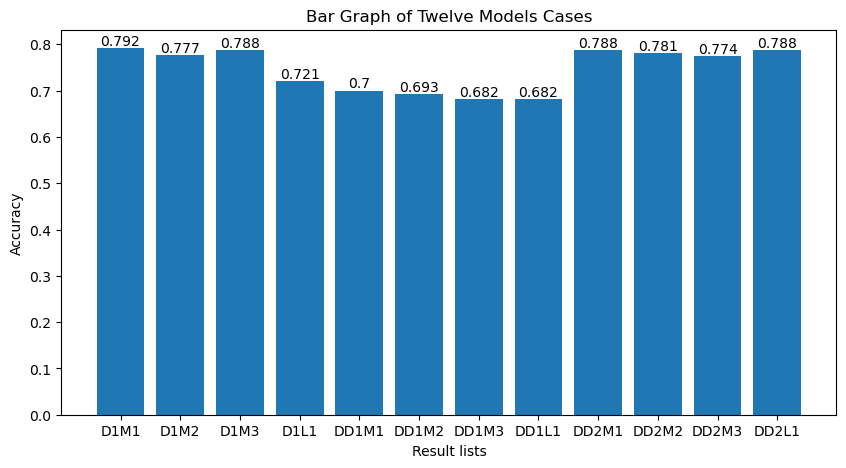

In [137]:
labels = ['D1M1', 'D1M2', 'D1M3', 'D1L1', 'DD1M1', 'DD1M2','DD1M3','DD1L1','DD2M1','DD2M2','DD2M3','DD2L1']
values = [a, b, c, d, e, f,g,h,i,j,k,l]

for iz in range(len(values)):
    values[iz] = round(values[iz], 3)
# Create the bar graph
plt.figure(figsize=(10, 5))  # Adjust the width and height as needed

# Create a bar graph with the specified bar width
plt.bar(labels, values)
for iss, value in enumerate(values):
    plt.text(iss, value, str(value), ha='center', va='bottom')
# Add a title and labels
plt.title('Bar Graph of Twelve Models Cases')
plt.xlabel('Result lists')
plt.ylabel('Accuracy')

# Display the graph
plt.show()

**Analysis:** When examining the performance across different datasets, it's evident that the initial full dataset yields the highest accuracy results, reaching up to 0.792. However, in the derived dataset 1, which involves extracting only nouns and limiting the dataset for testing, we observe a slight dip in accuracy. This decline may be attributed to the reduction in data and the specific focus on nouns, which can result in a loss of context. In contrast, derived dataset 2, which includes three entities for comparison, exhibits improved accuracy. Interestingly, there is a noteworthy consistency between the Linear Regression model and MLP models across these datasets, suggesting that the simpler linear model can perform on par with more complex neural networks

**References:** 
https://carpentries-incubator.github.io/machine-learning-novice-sklearn/06-neural-networks/index.html
                                                         
https://austingwalters.com/classify-sentences-via-a-multilayer-perceptron-mlp/                                                                                                     
https://php-ml.readthedocs.io/en/0.5.0/machine-learning/neural-network/multilayer-perceptron-classifier/                                                 
https://analyticsindiamag.com/a-beginners-guide-to-scikit-learns-mlpclassifier/
